In [ ]:
# context

In [322]:
# task

In [ ]:
# importing all required libraries

In [49]:
import re 
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
# importing data set

In [248]:
df=pd.read_csv('D:\\python\\spam.tsv',sep='\t')

In [249]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
# checking for null values

In [250]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [251]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [252]:
df[['label','message']].describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [253]:
cat=df.drop(['length','punct'],axis=1)

In [ ]:
# describtion of label and message

In [254]:
cat.groupby('label').describe()


message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
# count of spam message is very low as compared to ham message

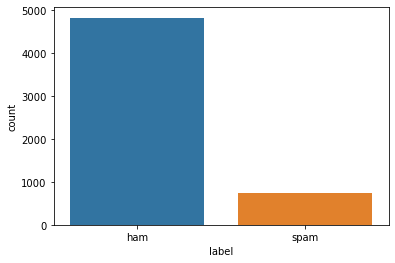

In [255]:
sns.countplot(x='label',data=df)

In [256]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [257]:
# shape of ham data 

In [258]:
ham.shape

(4825, 4)

In [259]:
# shape os spam data

In [260]:
spam.shape

(747, 4)

In [261]:
# plotting the ham message wrt to length of msg

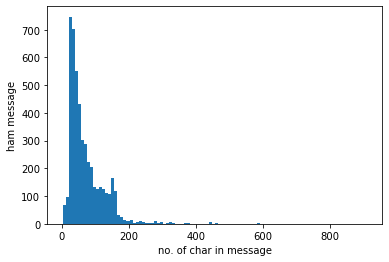

In [262]:
plt.hist(df[df['label']=='ham']['length'],bins=100)
plt.xlabel('no. of char in message')
plt.ylabel('ham message')
plt.show()

In [ ]:
# plotting spam message wrt to length of message

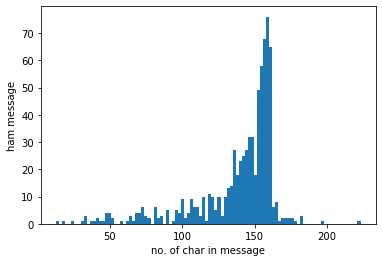

In [263]:
plt.hist(df[df['label']=='spam']['length'],bins=100)
plt.xlabel('no. of char in message')
plt.ylabel('ham message')
plt.show()

In [ ]:
# plotting ham and spam message all together

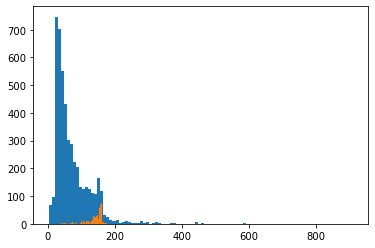

In [264]:
plt.hist(df[df['label']=='ham']['length'],bins=100)
plt.hist(df[df['label']=='spam']['length'],bins=100)
plt.show()

In [265]:
# plotting with puncuation

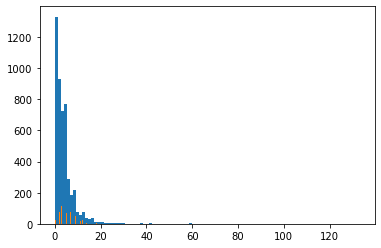

In [266]:
plt.hist(df[df['label']=='ham']['punct'],bins=100)
plt.hist(df[df['label']=='spam']['punct'],bins=100)
plt.show()

In [267]:
# Data Cleaning

In [268]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [269]:
# As we can see message have puntuations and digits and special character so we remove all these things

In [270]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [271]:
# Removing all the Special characters
# Applying lower case on the all the fetched data so that it cann't read the lower cases and the upper case seprately

# applying lemmatization
# bcz it keeps the word meaning to the basic
# and applying stopwords which remove all the stopwords of english

In [272]:
# creating object for lemmatization
wordnet=WordNetLemmatizer()

In [273]:
corprus=[]
for i in range(0,len(df)):
    data=re.sub('[^a-z,A-Z]',' ',df['message'][i])
    data=data.lower()
    data=data.split()
    data=[wordnet.lemmatize(word) for word in data if not word in stopwords.words('english')]
    data=' '.join(data)
    corprus.append(data)
    

In [274]:
# data we extracted is now clean

In [275]:
corprus

['go jurong point, crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf, life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send, rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight, k cried enough today',
 'six chance win cash , pound txt csh send cost p day, days, tsandcs apply reply hl info',
 'urgent week free membership , prize jackpot txt word claim c www dbuk net lccltd pob

In [277]:
x=np.asanyarray(corprus)

In [ ]:
# applying train test split

In [278]:
# shuffle will help to shuffle the data so the data will mix up in the random way
# stratify will help to divide the label ham and spam in 70 and 30 prpotion

In [287]:
train_x,test_x,train_y,test_y=train_test_split(x,df['label'],test_size=0.3,random_state=0,shuffle=True,stratify=df['label'])

In [ ]:
# trainig data shape

In [312]:
train_x.shape

(3900,)

In [313]:
# testing data shape

In [314]:
test_x.shape

(1672,)

In [ ]:
# Applying Term frequency and Inverse Term frequency

In [280]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)

In [281]:
train_x=vectorizer.fit_transform(train_x)

In [282]:
train_x.shape

(3900, 5000)

In [283]:
# creating pipeline and analyzing model

In [284]:
#  Applying Support vector 

In [285]:
clf=Pipeline([('TF-IDF',TfidfVectorizer()),('support',SVC(C=100,gamma='auto'))])

In [288]:
clf.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('TF-IDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('support',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

In [289]:
pred_y=clf.predict(test_x)

In [290]:
accuracy_score(test_y,pred_y)

0.8660287081339713

In [291]:
confusion_matrix(test_y,pred_y)

array([[1448,    0],
       [ 224,    0]], dtype=int64)

In [292]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.87      0.80      1672



C:\Users\Rageshwar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
# applying navie bayes

In [294]:
clf=Pipeline([('TF-IDF',TfidfVectorizer()),('clf',MultinomialNB())])

In [295]:
clf.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('TF-IDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [296]:
pred_y=clf.predict(test_x)

In [297]:
accuracy_score(test_y,pred_y)

0.9635167464114832

In [298]:
confusion_matrix(test_y,pred_y)

array([[1448,    0],
       [  61,  163]], dtype=int64)

In [299]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
# as navie bayes outperforms support vector machine so we predict user value from navie bayes

In [ ]:
# user Inputs

In [301]:
clf.predict(['hey, my name is rageshwar sharma'])

array(['ham'], dtype='<U4')

In [310]:
clf.predict(['tickets to goa has booked'])

array(['ham'], dtype='<U4')

In [309]:
clf.predict(['claim, your tickets you have win tickets to goa'])

array(['spam'], dtype='<U4')

In [308]:
clf.predict(['winner valued network customer selected receivea prize reward claim call claim code kl valid hour'])

array(['spam'], dtype='<U4')

In [ ]:
# plotting Roc and AUC 
# the curve show use the area under curve for which value is predicted true is 98%
# 98% chance model can distinguish b/w ham and spam

In [318]:
test_y=pd.get_dummies(test_y,drop_first=True)

In [319]:
y_pre_prob=clf.predict_proba(test_x)

In [320]:
import sklearn.metrics as metrics
pred=y_pre_prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(test_y,pred)
roc_auc=metrics.auc(fpr,tpr)

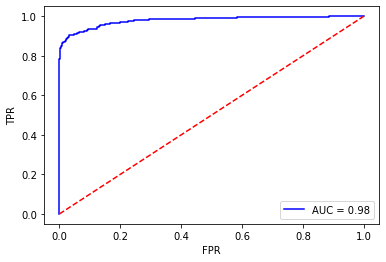

In [321]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()